In [1]:
#Title: Final Project - Non-Radial Stellar Pulsation
#Author: Andrew Ayala
#Decription:
"""
This program creates a simulation of periodic non-radial stellar pulsation.  These pulsations are waves that propogate across the surface of a 
star due to either pressure or gravitational gradients, known as p-mode and g-mode waves. These pulsation waves can be modeled using 
spherical harmonics.  Using the "Starry" python package one can model differential magnitudes of a spherical surface, however, there 
are no methods within this package enabling these surfaces to evolve or vary over time-- or in another word; pulsate. My program attempts 
to exploit this static nature of the "Starry" package to create random simulated data of a periodic pulsating stellar source, then proceeds to 
simulate observation of this source by calculating integrated surface flux at discrete timesteps over a given baseline, 
and finally attempts to recreate the observed pulsation by taking the Fourier transform of the data and reinserting the dominant observed 
frequencies into spherical harmonic maps.  The result should be a source of variabilty that resembles our original randomly constructed star.
(For the simplicity of this project which can become extremely complicated very easily, I have limited the scope of this code to 
l-modes and m-modes no greater/less than +/-2). This code takes about 3 or so minutes to run, between closing matplotlib animations and plots
and waiting for new ones to be constructed.  It is recommended that one runs this code a handful of times to observe the effects of different
random l and m-mode values with varyting amplitudes and frequencies. Included in the project folder is a Jupyter Notebook with this same code
to streamline visualization and plot creation.
"""

### IMPORT PACKAGES ###
import numpy as np
import math as m
import matplotlib.pyplot as plt
import starry
import matplotlib.animation as animation
from IPython.display import HTML
starry.config.lazy = False

In [2]:
### INITIALIZE FUNCTIONS ###
#Create l-mode and m-mode functions
    ##These functions are l-mode and m-mode constructors. By assigning functions otherwise static l-mode and m-mode attributes of 
    ##'Starry' map-objects, one can combine modes of the same absolute value l's and m's to simulate variabilty or periodic pulsation
def L1M1(t,frequency=1,phase0=0,amp=1):
    cl1p1 = amp*np.cos(2*np.pi*t*frequency-phase0)
    #Construct a plus 1 wave
    if sign == 1:
        cl1m1 = -amp*np.sin(2*np.pi*t*frequency-phase0)
    #Construct a minus 1 pulsation
    else:
        cl1m1 = amp*np.sin(2*np.pi*t*frequency-phase0)
    return cl1p1,cl1m1

def L1M0(t,frequency=1,phase0=0,amp=1):
    return amp*np.cos(2*np.pi*t*frequency-phase0)

def L2M1(t,frequency=1,phase0=0,amp=1):
    cl2p1 = amp*np.cos(2*np.pi*t*frequency-phase0)
    #Construct a plus 1 wave
    if sign == 1:
        cl2m1 = -amp*np.sin(2*np.pi*t*frequency-phase0)
    #Construct a minus 1 pulsation
    else:
        cl2m1 = amp*np.sin(2*np.pi*t*frequency-phase0)
    return cl2p1,cl2m1

def L2M2(t,frequency=1,phase0=0,amp=1):
    cl2p2 = amp*np.cos(2*np.pi*t*frequency-phase0)
    #Construct a plus 2 wave
    if sign == 1:
        cl2m2 = -amp*np.sin(2*np.pi*t*frequency-phase0)
    #Construct a minus 2 pulsation
    else:
        cl2m2 = amp*np.sin(2*np.pi*t*frequency-phase0)
    return cl2p2,cl2m2

def L2M0(t,frequency=1,phase0=0,amp=1):
    return amp*np.cos(2*np.pi*t*frequency-phase0)

In [3]:
### MAIN ###

#Initialize arrays, objects, and constants
    ##This 'map' object is a sphere, observed as a disc, which will act as our stellar source
    ##Alongside this the sampling rate, random number generator, observation duration, and initial conditions are set
map = starry.Map(ydeg=2)
map.inc = 0
samplingRate = 1000
tobs = 1/samplingRate
timeArray = np.arange(0, 1, tobs)
fluxArray = np.zeros(len(timeArray))
mapArray = []

map[1,-1] = 0
map[1,0]  = 0
map[1,1]  = 0
map[2,-2] = 0
map[2,-1] = 0
map[2,0]  = 0
map[2,1]  = 0
map[2,2]  = 0

rng = np.random.default_rng()
fArray =  np.array(rng.integers(low=1, high=10, size=8))
aArray =  np.array(rng.integers(low=1, high=10, size=8))
sign = 0

Pre-computing some matrices... Done.
Compiling `set_vector`... Done.


In [4]:
#Set coefficient values for pulsation
    ##The sign indicates whether we are constructing an negative or positive m-mode due to both modes calling the same function
for i,time in enumerate(timeArray):
    sign = -1
    M1cl1p1,M1cl1m1 = L1M1(time,frequency=fArray[1],amp=aArray[1])
    M1cl2p1,M1cl2m1 = L2M1(time,frequency=fArray[3],amp=aArray[3])
    M2cl2p2,M2cl2m2 = L2M2(time,frequency=fArray[5],amp=aArray[5])

    sign = 1
    P1cl1p1,P1cl1m1 = L1M1(time,frequency=fArray[2],amp=aArray[2])
    P1cl2p1,P1cl2m1 = L2M1(time,frequency=fArray[4],amp=aArray[4])
    P2cl2p2,P2cl2m2 = L2M2(time,frequency=fArray[6],amp=aArray[6])

    cl1m0 = L1M0(time,frequency=fArray[0],amp=aArray[0])
    cl2m0 = L2M0(time,frequency=fArray[7],amp=aArray[7])

    #Add coefficients to map
    map[1,-1] = M1cl1m1 + M1cl1p1
    map[1,0]  = cl1m0
    map[1,1]  = P1cl1m1 + P1cl1p1
    map[2,-2] = M2cl2m2 + M2cl2p2
    map[2,-1] = M1cl2m1 + M1cl2p1
    map[2,0]  = cl2m0
    map[2,1]  = P1cl2m1 + P1cl2p1
    map[2,2]  = M2cl2m2 +  M2cl2p2
    fluxArray[i] = map.flux()
    mapArray.append(map.render())

Compiling `set_vector`... Done.
Compiling `flux`... Done.
Compiling `render`... Done.


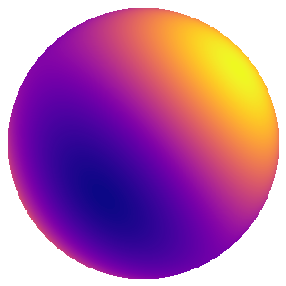

In [5]:
#Make gif of pulsation for visualization purposes
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.axis('off')
imArray = []

for i in mapArray:
    im = ax.imshow(i, cmap="plasma", animated=True)
    imArray.append([im])

anim = animation.ArtistAnimation(fig, imArray, interval = 50, blit=True)
writergif = animation.PillowWriter(fps=30)
HTML(anim.to_html5_video())
#Commented out: option to save gif to file
##anim.save('filename.gif',writer=writergif)

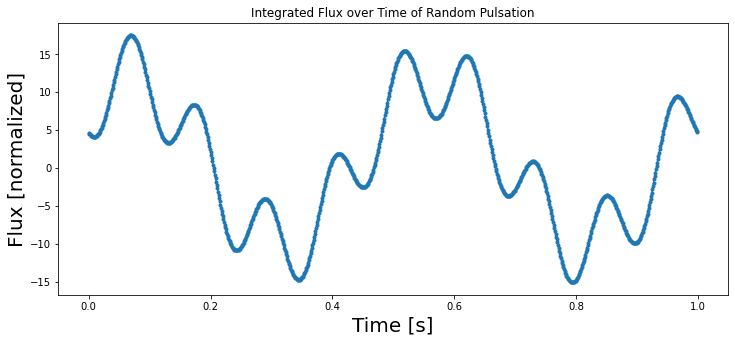

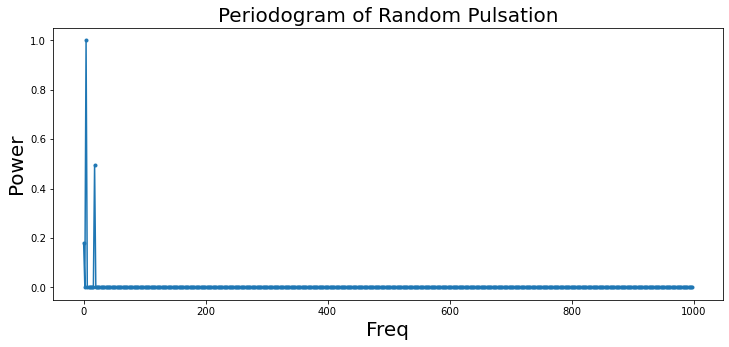

In [6]:
#Show flux over time for random pulsation
plt.figure(figsize=(12, 5))
plt.plot(timeArray, fluxArray, '.-')
plt.title("Integrated Flux over Time of Random Pulsation")
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

#Perform Fourier transform of periodic signal
fourierSpectrum = abs(np.fft.rfft(fluxArray))
fourierSpectrum = fourierSpectrum/np.max(fourierSpectrum)
N = len(fourierSpectrum)
n = np.arange(N)
T = N/samplingRate
freq = n/T

#Plot periodiogram of dominant frequencies of random pulsation
plt.figure(figsize=(12, 5))
plt.plot(freq, abs(fourierSpectrum), '.-')
plt.title("Periodogram of Random Pulsation", fontsize=20)
plt.xlabel("Freq", fontsize=20)
plt.ylabel("Power", fontsize=20)

#Retrieve dominant frequencies, corresponding amplitudes, and store in arrays
maxAmps = np.zeros(8)
realFreqs = abs(np.real(fourierSpectrum))
sortData = np.argsort(realFreqs)
data = realFreqs[sortData]

newAmpArray = abs(np.real(data[-8:]))*10
newFreqArray = sortData[-8:]

In [7]:
#Reconstruct stellar source using dominant frequencies of observed periodic signal
map.reset()
map = starry.Map(ydeg=2)
newMapArray = []
newFluxArray = np.zeros(len(timeArray))
fArray = newFreqArray
aArray = newAmpArray

for i,time in enumerate(timeArray):
    sign = -1
    M1cl1p1,M1cl1m1 = L1M1(time,frequency=fArray[1],amp=aArray[1])
    M1cl2p1,M1cl2m1 = L2M1(time,frequency=fArray[3],amp=aArray[3])
    M2cl2p2,M2cl2m2 = L2M2(time,frequency=fArray[5],amp=aArray[5])

    sign = 1
    P1cl1p1,P1cl1m1 = L1M1(time,frequency=fArray[2],amp=aArray[2])
    P1cl2p1,P1cl2m1 = L2M1(time,frequency=fArray[4],amp=aArray[4])
    P2cl2p2,P2cl2m2 = L2M2(time,frequency=fArray[6],amp=aArray[6])

    cl1m0 = L1M0(time,frequency=fArray[0],amp=aArray[0])
    cl2m0 = L2M0(time,frequency=fArray[7],amp=aArray[7])

    #Add coefficients to map
    map[1,-1] = M1cl1m1 + M1cl1p1
    map[1,0]  = cl1m0
    map[1,1]  = P1cl1m1 + P1cl1p1
    map[2,-2] = M2cl2m2 + M2cl2p2
    map[2,-1] = M1cl2m1 + M1cl2p1
    map[2,0]  = cl2m0
    map[2,1]  = P1cl2m1 + P1cl2p1
    map[2,2]  = M2cl2m2 +  M2cl2p2
    newFluxArray[i] = map.flux()
    newMapArray.append(map.render())

Pre-computing some matrices... Done.
Compiling `set_vector`... Done.
Compiling `flux`... Done.
Compiling `render`... Done.


1000


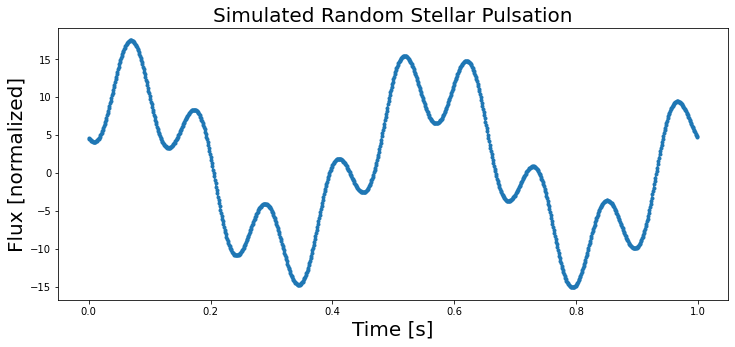

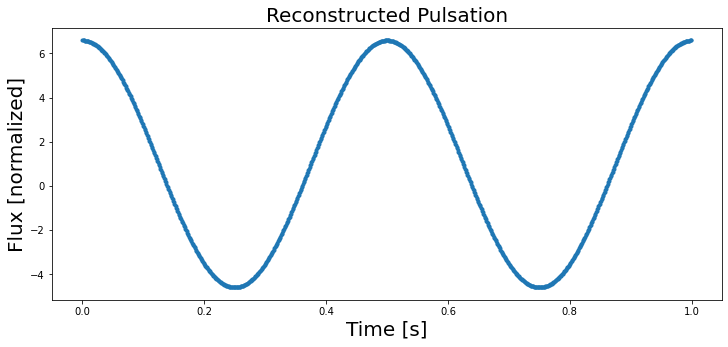

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(timeArray, fluxArray, '.-')
plt.title("Simulated Random Stellar Pulsation", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

plt.figure(figsize=(12, 5))
plt.plot(timeArray, newFluxArray, '.-')
plt.title("Reconstructed Pulsation", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)
print(len(timeArray))

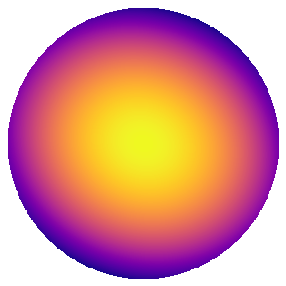

In [9]:
#Make gif of reconstructed NEW pulsation for visualization purposes
newFig = plt.figure(figsize=(5,5))
axNew = newFig.add_subplot(1,1,1)
axNew.axis('off')
imArrayNew = []

for i in newMapArray:
    im = axNew.imshow(i, cmap="plasma", animated=True)
    imArrayNew.append([im])

newAnim = animation.ArtistAnimation(newFig, imArrayNew, interval = 50, blit=True)
writergifNew = animation.PillowWriter(fps=30)
HTML(newAnim.to_html5_video())
#Commented out: option to save gif to file
##anim.save('filename.gif',writer=writergif)

In [ ]:
### CONCLUSION ###
"""
The goals of this project proved to be far more lofty than anticipated.  ALthough my code seems to have the ability to reconstruct the observed
periodic variability for lower frequency pulsations, the higher frequencies and higher m-mode attributions seem to be hard to reconcile.  The
result is an overall periodic variabilty in the flux v. time domain that quite closely matches our signal over a long baseline and low frequency
variability.  However, the higher frequency pulsations (or jitter) have trouble being recaptured as well as the proper higher l and m-mode spherical harmonics.
This can be witnessed in the gif visualizations of the pulsations, as the form and variabilty of the color map of our reconstructed source
does not quite match the pattern with which the input random pulsation is observed.
"""

In [ ]:
## EXTRA ###
"""
The code below are attempts to add occultations and transits into the model.  White dwarfs, some of the most active non-radial stellar pulsators in the universe,
are often found in binary systems.  In eclipsing binary systems, the occultation transits may in fact provide a benefit in narrowing down which l and m-modes are
extant and responsible for observed pulsation frequencies.  The scope of this part of the project proved to be extremely diffuclt and quite the rabbit hole.
I have included what menial progress I have made, but it is not intended to be used in the program as it is incomplete, and thus has been left out of the final
.py project file.
"""

In [33]:
A_y = np.array(map.y[1:])
map.reset()
map.add_spot(amp=-0.075, sigma=0.1, lat=-30, lon=60)
B_y = np.array(map.y[1:])

Compiling `expand_spot`... Done.


In [139]:
A = dict(
    ydeg=2,  # degree of the map
    udeg=1,  # degree of the limb darkening
    inc=90.0,  # inclination in degrees
    amp=1.0,  # amplitude (a value prop. to luminosity)
    r=1.0,  #  radius in R_sun
    m=1.0,  # mass in M_sun
    prot=1,  # rotational period in days
    u=[0.40],  # limb darkening coefficients
    y=A_y,  # the spherical harmonic coefficients
)

B = dict(
    ydeg=1,  # degree of the map
    udeg=1,  # degree of the limb darkening
    inc=90.0,  # inclination in degrees
    amp=0.5,  # amplitude (a value prop. to luminosity)
    r=0.5,  #  radius in R_sun
    m=0.5,  #  mass in M_sun
    porb=1.00,  # orbital period in days
    prot=0.5,  # rotational period in days
    t0=0.5,  # reference time in days (when it transits A)
    u=[0.20],  # limb darkening coefficients
    y=B_y,  # the spherical harmonic coefficients
)

In [140]:
pri = starry.Primary(
    starry.Map(ydeg=A["ydeg"], udeg=A["udeg"], inc=A["inc"], amp=A["amp"]),
    r=A["r"],
    m=A["m"],
    prot=A["prot"],
)
pri.map[1:] = A["u"]
pri.map[1:, :] = A["y"]
pri.map.show(theta=np.linspace(0, 360, 50))

Pre-computing some matrices... Done.
Compiling `set_vector`... Done.
Compiling `render`... Done.


In [40]:
# sec = starry.Secondary(
#     starry.Map(ydeg=B["ydeg"], udeg=B["udeg"], inc=B["inc"], amp=B["amp"]),
#     r=B["r"],
#     m=B["m"],
#     porb=B["porb"],
#     prot=B["prot"],
#     t0=B["t0"],
#     inc=B["inc"],
# )
# sec.map[1:] = B["u"]
# sec.map[1:, :] = B["y"]
# sec.map.show(theta=np.linspace(0, 360, 50))

In [141]:
sys = starry.System(pri, sec)
sys.show(t=np.linspace(-2.5, 2.5, 300), window_pad=4.75, figsize=(5, 5))

Compiling `render`... Done.


Compiling `X`... Done.


Text(0, 0.5, 'normalized flux')

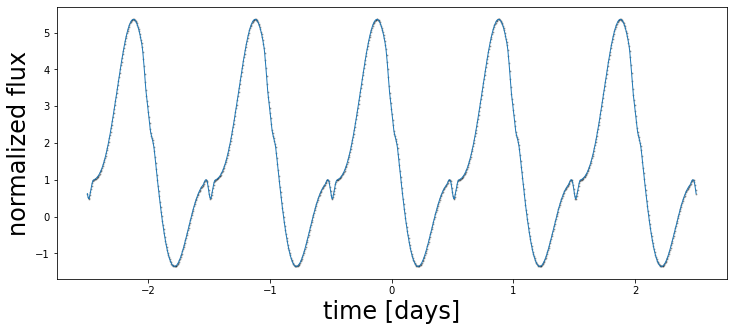

In [142]:
t = np.linspace(-2.5, 2.5, 1000)
flux_true = sys.flux(t)
sigma = 0.0005
flux = flux_true + sigma * np.random.randn(len(t))
fig, ax = plt.subplots(1, figsize=(12, 5))
ax.plot(t, flux, "k.", alpha=0.3, ms=2)
ax.plot(t, flux_true, lw=1)
ax.set_xlabel("time [days]", fontsize=24)
ax.set_ylabel("normalized flux", fontsize=24)

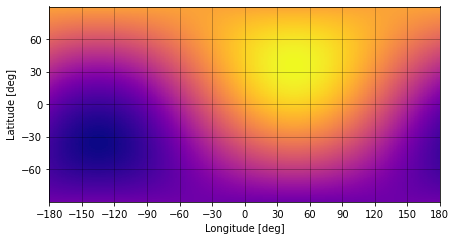

Text(0, 0.5, 'Flux [normalized]')

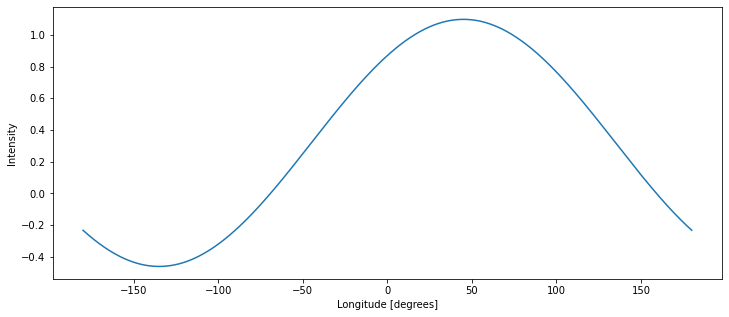

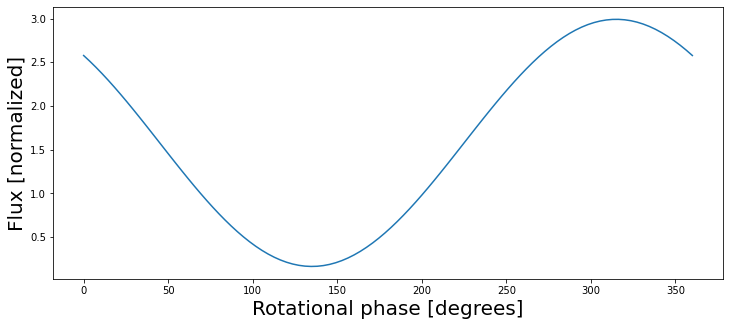

In [99]:
map.inc = 60
map.show(theta=theta)
map.show(projection="rect")




    
I = map.intensity(lat=0, lon=lon)
fig = plt.figure(figsize=(12, 5))
plt.plot(lon, I)
plt.xlabel("Longitude [degrees]")
plt.ylabel("Intensity")

plt.figure(figsize=(12, 5))
plt.plot(theta, map.flux(theta=theta))
plt.xlabel("Rotational phase [degrees]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20)

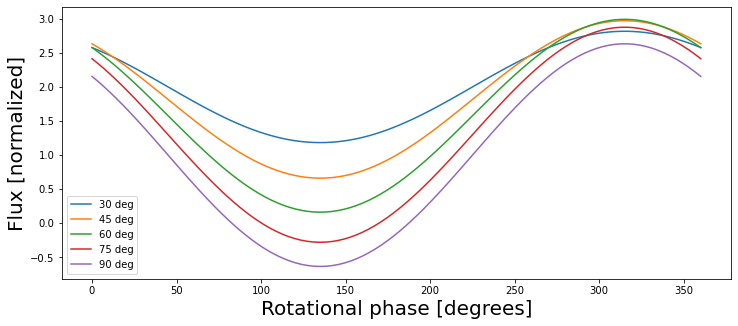

In [100]:
plt.figure(figsize=(12, 5))
for inc in [30, 45, 60, 75, 90]:
    map.inc = inc
    plt.plot(theta, map.flux(theta=theta), label="%2d deg" % inc)
plt.legend(fontsize=10)
plt.xlabel("Rotational phase [degrees]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);